In [1]:
import numpy as np
import pandas as pd
df_1 = pd.read_csv('googleplaystore.csv')
df_1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [2]:
#First, we want to drop unnecessary columns: current ver and android ver. 
#The dataset didn't specify the meaning of these two columns and we believe they are not related to our analysis purpose.
df_1.drop(['Current Ver','Android Ver'], axis = 1, inplace = True)

In [3]:
# Then we want to remove the space in the column names
df_1.rename({'Content Rating':'Content_rating','Last Updated':'Last_updated'}, axis = 1, inplace=True)
df_1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


Data cleaning:
1. delete nan ratings
2. check uniqueness of each column
3. delete unnecessary columns: current ver. android ver.
4. change content rating into age range, so can do regression
5. size: check how many varies with device, delete or fill with average or mode, we can delete "M"
6. "Installs" to numerical, histgram graph, bins
7. "Type" dummy variable
8. "Price" might need to delete dollar sign
9. Save only year in "last updated"
10. Use category, change genre to number of genres ???
11. create index for app or app as the index?

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_updated    10841 non-null  object 
dtypes: float64(1), object(10)
memory usage: 931.8+ KB


In [5]:
#Rating is the initial Y variable.
#so we prefer to drop the nan value since this level of missing values won't affect our results largely
df_1 = df_1.dropna()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content_rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_updated    9366 non-null   object 
dtypes: float64(1), object(10)
memory usage: 878.1+ KB


In [6]:
#We detect that there are duplicated app names, but we think it is possible since App is not a primary key.
# There are different apps using same app names, or same app with different versions, etc.
df_1['App'].nunique()

8196

In [7]:
#But if all the fields is duplicated, then we should remove it.
df_1.drop_duplicates(inplace=True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   object 
 4   Size            8892 non-null   object 
 5   Installs        8892 non-null   object 
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   object 
 8   Content_rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last_updated    8892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 833.6+ KB


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1828/972565967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop_duplicates(inplace=True)


In [8]:
# Now we have 8892 rows and next, we need to change the type of each column.
# Check if 'Reviews' is numeric and change it into integers
if df_1.Reviews.str.isnumeric().sum()==8892:
    df_1.Reviews = df_1.Reviews.astype(int)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
# There are 3 types of data in Size, ending with M, K, or 'varies with device'.
# Assuming 1 MB = 1000 KB
# Fill varies with device with the average
df_1 = df_1.reset_index(drop=True)
for i in range(len(df_1.Size)):
    if "M" in df_1.Size[i]:
        df_1.Size[i] = float(df_1.Size[i][:-1]) * 1000
    elif "k" in df_1.Size[i]:
        df_1.Size[i] = float(df_1.Size[i][:-1])
    else:
        df_1.Size[i] = np.nan
df_1.Size = round(df_1.Size.fillna(df_1.Size.mean())).astype(int)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1828/3293486128.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.Size[i] = float(df_1.Size[i][:-1]) * 1000
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1828/3293486128.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.Size[i] = np.nan
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1828/3293486128.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [10]:
#change installs to numerical, bins for hist
df_1.Installs = df_1.Installs.str.replace(',','')
df_1.Installs = df_1.Installs.str.replace('+','')
df_1.Installs = df_1.Installs.astype(int)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1828/3891234704.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_1.Installs = df_1.Installs.str.replace('+','')


In [11]:
#change type to int first, can discuss how to use this later, or create dummy variable
# 0 - Free, 1 - Paid
df_1['Type'] = (df_1['Type'] == 'Paid').astype(int)

In [12]:
#replace $ and change to float
df_1.Price = df_1.Price.str.replace('$','').astype(float)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_1828/2208409.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_1.Price = df_1.Price.str.replace('$','').astype(float)


In [13]:
# I think it's not necessary to change it to age range as they are all crossed.
df_1.Content_rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [14]:
# at most 2 genres, we can talk if double genres would contribute to the performance of app
df_1.Genres = df_1.Genres.str.count(';').astype(int)+1

In [15]:
# set 2019-01-01 as the data collection date
# count the days to latest updated 
import datetime
df_1['Last_updated'] = pd.to_datetime(df_1['Last_updated'])
df_1['Days_after_last_updated'] = (datetime.datetime(2019, 1, 1) - df_1['Last_updated']).dt.days

In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   App                      8892 non-null   object        
 1   Category                 8892 non-null   object        
 2   Rating                   8892 non-null   float64       
 3   Reviews                  8892 non-null   int32         
 4   Size                     8892 non-null   int32         
 5   Installs                 8892 non-null   int32         
 6   Type                     8892 non-null   int32         
 7   Price                    8892 non-null   float64       
 8   Content_rating           8892 non-null   object        
 9   Genres                   8892 non-null   int32         
 10  Last_updated             8892 non-null   datetime64[ns]
 11  Days_after_last_updated  8892 non-null   int64         
dtypes: datetime64[ns](1), float64(2), 

In [17]:
df_1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Days_after_last_updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,0,0.0,Everyone,1,2018-01-07,359
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,0,0.0,Everyone,2,2018-01-15,351
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,0,0.0,Everyone,1,2018-08-01,153
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,0,0.0,Teen,1,2018-06-08,207
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,0,0.0,Everyone,2,2018-06-20,195
...,...,...,...,...,...,...,...,...,...,...,...,...
8887,FR Calculator,FAMILY,4.0,7,2600,500,0,0.0,Everyone,1,2017-06-18,562
8888,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,0,0.0,Everyone,1,2017-07-25,525
8889,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,0,0.0,Everyone,1,2018-07-06,179
8890,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,22748,1000,0,0.0,Mature 17+,1,2015-01-19,1443


In [18]:
df_1.to_excel('Google Playstore.xlsx')

In [19]:
temp = df_1[df_1['Content_rating']=='Mature 17+'].groupby('Category').App.count().to_frame()
temp.to_excel('temp1.xlsx')

<AxesSubplot:ylabel='App'>

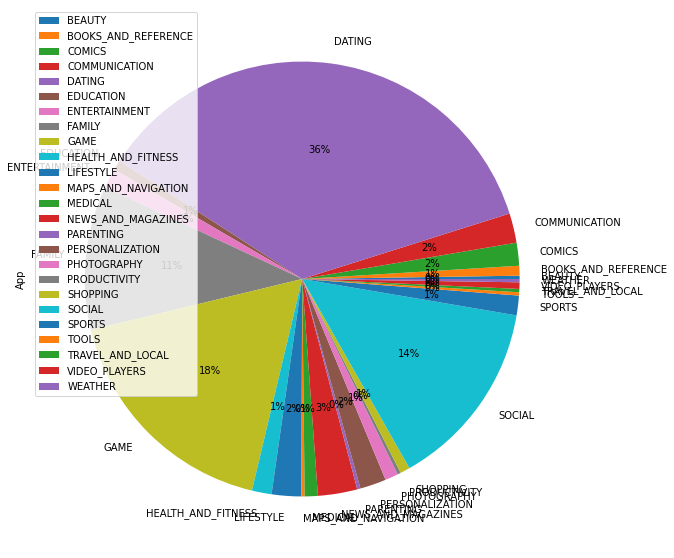

In [20]:
temp.plot(kind='pie', y='App', autopct='%1.0f%%',figsize=(10,10))

<AxesSubplot:title={'center':'Count of Installs in bins'}, xlabel='binned_installs'>

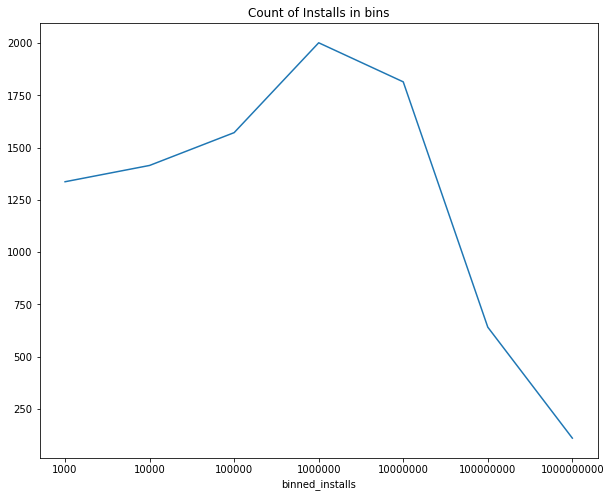

In [21]:
import numpy as np
binned_installs = pd.cut(df_1['Installs'],
                     bins = [0, 1001, 10001, 100001, 1000001, 10000001, 100000001, 1000000001], 
                     labels=['1000', '10000', '100000', '1000000', '10000000', '100000000', '1000000000'])
dict_binned_installs = {'bin_impr': binned_installs}
temp = df_1
temp['binned_installs'] = pd.DataFrame(dict_binned_installs)
temp.groupby('binned_installs').Installs.count().plot(kind='line',figsize=(10,8), title='Count of Installs in bins')

<AxesSubplot:title={'center':'average rating of install bins'}, xlabel='binned_installs'>

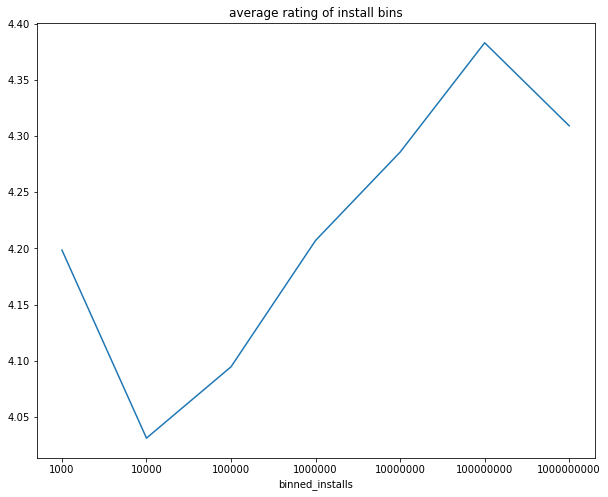

In [22]:
temp.groupby('binned_installs').Rating.mean().plot(kind='line',figsize=(10,8),title='average rating of install bins')

In [23]:
df_1.Days_after_last_updated.min()

146

<AxesSubplot:title={'center':'Total Installs per last updated days'}, xlabel='binned_updated_days'>

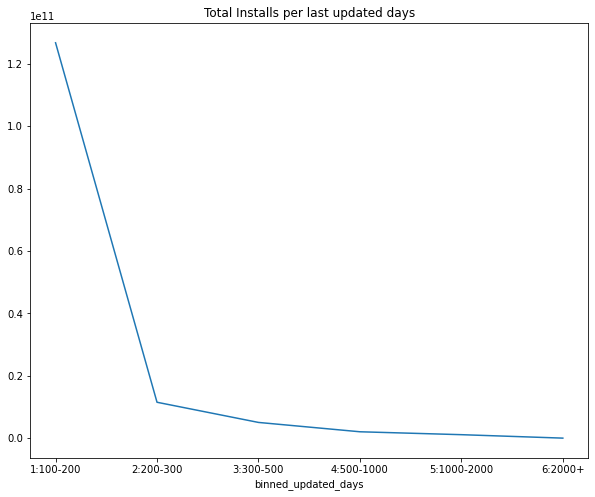

In [24]:
binned_updated_days = pd.cut(df_1['Days_after_last_updated'],
                     bins = [100, 200, 300, 500, 1000, 2000, np.inf], 
                     labels=['1:100-200', '2:200-300', '3:300-500', '4:500-1000', '5:1000-2000', '6:2000+'])
dict_binned_updated_days = {'bin_impr': binned_updated_days}
temp = df_1
temp['binned_updated_days'] = pd.DataFrame(dict_binned_updated_days)
temp.groupby('binned_updated_days').Installs.sum().plot(kind='line',figsize=(10,8),title='Total Installs per last updated days')

<AxesSubplot:title={'center':'Average Rating per last updated days'}, xlabel='binned_updated_days'>

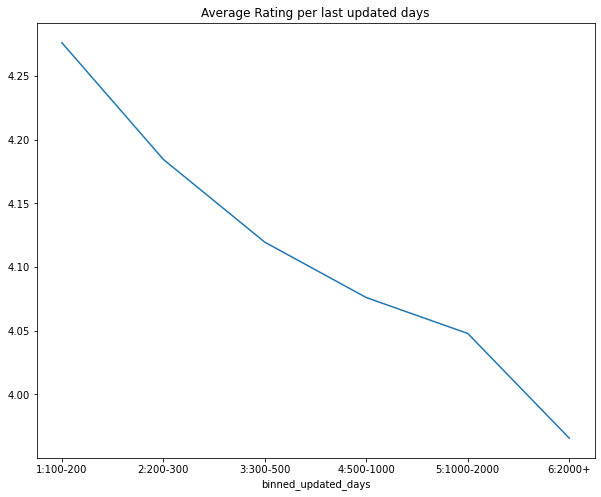

In [25]:
temp.groupby('binned_updated_days').Rating.mean().plot(kind='line',figsize=(10,8),title='Average Rating per last updated days')

Text(0.5, 1.0, 'Correlation between features')

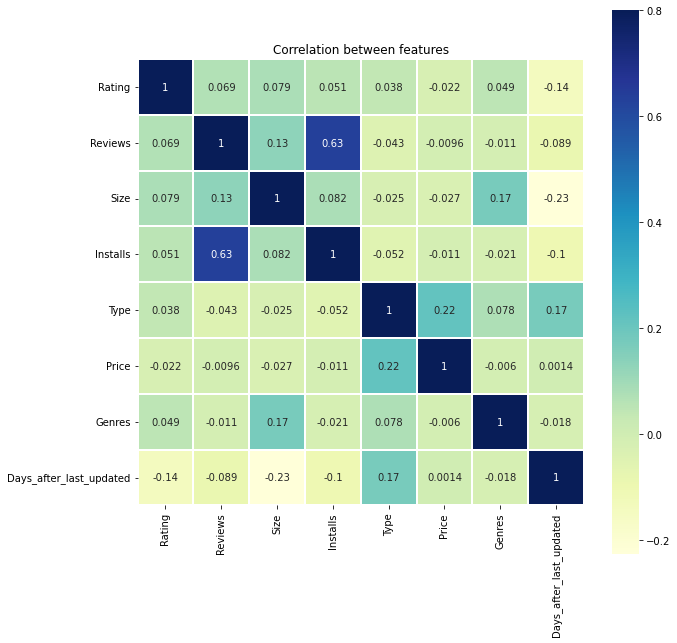

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(df_1.corr(), vmax=.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu' ,linecolor="white")
plt.title('Correlation between features')

# Simple Linear Regression:
i.Price & Installs

In [27]:
import sklearn
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)
from sklearn.preprocessing import LabelEncoder

In [28]:
slr = LinearRegression()
X = df_1 [['Installs']]
y = df_1 [["Price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
s = StandardScaler()
X_train = s.fit_transform(X_train)
slr.fit(X_train,y_train)
X_test = s.transform(X_test)
y_pred = slr.predict(X_test)
print(f'R2 score is {r2_score(y_pred,y_test)}')
print(f'Co-efficients are {slr.coef_}')
print(f'Intercept is {slr.intercept_}')

R2 score is -9588.90251662774
Co-efficients are [[-0.16526894]]
Intercept is [0.87127731]


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


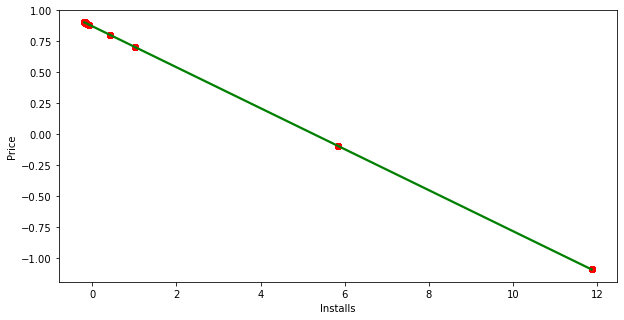

In [29]:
plt.figure(figsize=(10,5))
sns.regplot(X_test,y_pred,scatter_kws={"color": "red"},line_kws={"color": "green"})
plt.xlabel('Installs')
plt.ylabel('Price')

plt.show()

ii. Rating & Days_after_last_updated

In [30]:
slr = LinearRegression()
X = df_1 [['Days_after_last_updated']]
y = df_1 [["Rating"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
s = StandardScaler()
X_train = s.fit_transform(X_train)
slr.fit(X_train,y_train)
X_test = s.transform(X_test)
y_pred = slr.predict(X_test)
print(f'R2 score is {r2_score(y_pred,y_test)}')
print(f'Co-efficients are {slr.coef_}')
print(f'Intercept is {slr.intercept_}')

R2 score is -47.221679209586476
Co-efficients are [[-0.07354458]]
Intercept is [4.1829186]


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


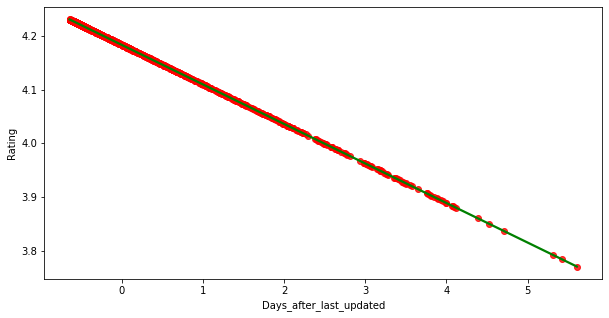

In [31]:
plt.figure(figsize=(10,5))
sns.regplot(X_test,y_pred,scatter_kws={"color": "red"},line_kws={"color": "green"})
plt.xlabel('Days_after_last_updated')
plt.ylabel('Rating')

plt.show()

iii. Installs & Days_after_last_updated

In [32]:
slr = LinearRegression()
X = df_1 [['Days_after_last_updated']]
y = df_1 [["Installs"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
s = StandardScaler()
X_train = s.fit_transform(X_train)
slr.fit(X_train,y_train)
X_test = s.transform(X_test)
y_pred = slr.predict(X_test)
print(f'R2 score is {r2_score(y_pred,y_test)}')
print(f'Co-efficients are {slr.coef_}')
print(f'Intercept is {slr.intercept_}')

R2 score is -119.40316334428674
Co-efficients are [[-8606506.26775609]]
Intercept is [15993799.3690426]


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


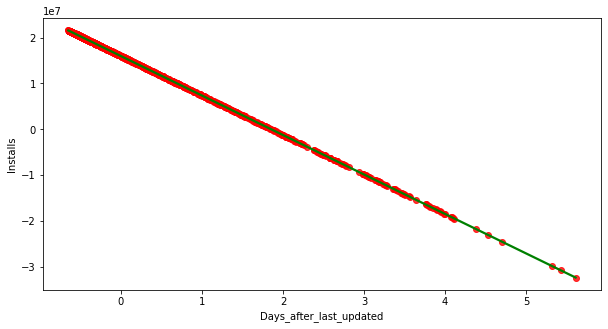

In [33]:
plt.figure(figsize=(10,5))
sns.regplot(X_test,y_pred,scatter_kws={"color": "red"},line_kws={"color": "green"})
plt.xlabel('Days_after_last_updated')
plt.ylabel('Installs')

plt.show()

In [34]:
df_2 = pd.read_csv('googleplaystore_user_reviews.csv')
df_2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [35]:
df_2 = df_2.dropna()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [36]:
df_1.merge(df_2, how = 'inner', on = 'App').drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Days_after_last_updated,binned_installs,binned_updated_days,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,0,0.0,Everyone,2,2018-01-15,351,1000000,3:300-500,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,0,0.0,Everyone,2,2018-01-15,351,1000000,3:300-500,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,0,0.0,Everyone,2,2018-01-15,351,1000000,3:300-500,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,0,0.0,Everyone,2,2018-01-15,351,1000000,3:300-500,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,0,0.0,Everyone,2,2018-01-15,351,1000000,3:300-500,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59119,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,22748,10000000,0,0.0,Everyone,1,2018-08-06,148,10000000,1:100-200,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
59120,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,22748,10000000,0,0.0,Everyone,1,2018-08-06,148,10000000,1:100-200,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
59121,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,22748,10000000,0,0.0,Everyone,1,2018-08-06,148,10000000,1:100-200,Too much ads,Positive,0.200000,0.200000
59122,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,22748,10000000,0,0.0,Everyone,1,2018-08-06,148,10000000,1:100-200,Just allow time ...,Neutral,0.000000,0.000000


In [37]:
df_1.merge(df_2, how = 'inner', on = 'App').drop_duplicates().App.nunique()

816

In [38]:
temp = df_1.merge(df_2, how = 'inner', on = 'App').drop_duplicates()
new = temp.groupby('App').Sentiment_Polarity.mean().to_frame().reset_index()
new2 = temp.groupby('App').Sentiment_Subjectivity.mean().to_frame().reset_index()
new = new.merge(new2, how = 'inner', on = 'App').drop_duplicates()
temp = temp[['App','Category','Reviews']]
new = new.merge(temp, how = 'inner', on = 'App').drop_duplicates()
new

,App,Sentiment_Polarity,Sentiment_Subjectivity,Category,Reviews
0,10 Best Foods for You,0.465906,0.493254,HEALTH_AND_FITNESS,2490
95,11st,0.185943,0.455340,SHOPPING,48732
134,1800 Contacts - Lens Store,0.318145,0.591098,MEDICAL,23160
174,1LINE – One Line with One Touch,0.196290,0.557315,GAME,214878
212,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.423659,0.512356,PERSONALIZATION,115773
...,...,...,...,...,...
40219,Hotels.com: Book Hotel Rooms & Find Vacation D...,0.098559,0.525508,TRAVEL_AND_LOCAL,260133
40258,Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.223750,0.380365,TOOLS,1116393
40290,Hotstar,0.038178,0.493964,ENTERTAINMENT,4885646
40322,Hotwire Hotel & Car Rental App,0.187029,0.459717,TRAVEL_AND_LOCAL,10323


In [39]:
df1 = new.groupby('Category').App.count().to_frame().reset_index()

In [40]:
new_temp = new[new['Sentiment_Polarity']<0]
df2 = new_temp.groupby('Category').App.count().to_frame().reset_index()

In [41]:
df = df1.merge(df2, how='inner', on ='Category')
df['NegativePercent'] = round(df['App_y']/df['App_x'],3) * 100
df.sort_values('NegativePercent',ascending = False)

,Category,App_x,App_y,NegativePercent
17,SOCIAL,26,7,26.9
9,GAME,167,36,21.6
2,BUSINESS,24,4,16.7
1,BEAUTY,6,1,16.7
20,TRAVEL_AND_LOCAL,53,7,13.2
0,AUTO_AND_VEHICLES,8,1,12.5
10,HOUSE_AND_HOME,17,2,11.8
12,MEDICAL,36,4,11.1
21,VIDEO_PLAYERS,9,1,11.1
4,DATING,45,5,11.1


In [42]:
df.to_excel('temp2.xlsx')

# Multiple Linear Regression

i: Reviews & sentiment_polarity, snetiment_subjectivity

In [43]:
X = new [['Sentiment_Polarity','Sentiment_Subjectivity']]
y = new [["Reviews"]]
mlr = LinearRegression()
s = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split into train and test parts
X_train_sm = s.fit_transform(X_train)
mlr.fit(X_train_sm, y_train)
X_test_sm = s.transform(X_test)
y_pred_sm = mlr.predict(X_test_sm)
print(f'R2 score is {r2_score(y_pred_sm,y_test)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred_sm - y_test) ** 2))
print(f'Co-efficients are {mlr.coef_}')
print(f'Intercept is {mlr.intercept_}')

R2 score is -15.858192986947962
Residual sum of squares (MSE): 16334983438286.82
Co-efficients are [[-992562.94227862  223890.29981397]]
Intercept is [1405517.66357309]


ii. Rating & Size, Price, Content rating, and Days after last updated

In [44]:
labels = df_1['Content_rating'].unique().tolist()
df_1['Content_rating'] = df_1['Content_rating'].apply(lambda x: labels.index(x))

In [45]:
labels

['Everyone',
 'Teen',
 'Everyone 10+',
 'Mature 17+',
 'Adults only 18+',
 'Unrated']

In [46]:
X = df_1 [['Size','Price','Content_rating','Days_after_last_updated']]
y = df_1 [["Rating"]]
mlr = LinearRegression()
s = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split into train and test parts
X_train_sm = s.fit_transform(X_train)
mlr.fit(X_train_sm, y_train)
X_test_sm = s.transform(X_test)
y_pred_sm = mlr.predict(X_test_sm)
print(f'R2 score is {r2_score(y_pred_sm,y_test)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred_sm - y_test) ** 2))
print(f'Co-efficients are {mlr.coef_}')
print(f'Intercept is {mlr.intercept_}')

R2 score is -40.011659838784794
Residual sum of squares (MSE): 0.26
Co-efficients are [[ 0.02804146 -0.01141443 -0.00972685 -0.06778911]]
Intercept is [4.1829186]


iii Installs & Rating, Size, Reviews, Price, Content rating, and Days after last updated


In [47]:
X = df_1 [['Rating','Size', 'Reviews','Price','Content_rating','Days_after_last_updated']]
y = df_1 [["Installs"]]
mlr = LinearRegression()
s = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split into train and test parts
X_train_sm = s.fit_transform(X_train)
mlr.fit(X_train_sm, y_train)
X_test_sm = s.transform(X_test)
y_pred_sm = mlr.predict(X_test_sm)
print(f'R2 score is {r2_score(y_pred_sm,y_test)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred_sm - y_test) ** 2))
print(f'Co-efficients are {mlr.coef_}')
print(f'Intercept is {mlr.intercept_}')

R2 score is -0.029589388073766543
Residual sum of squares (MSE): 6140738581940644.00
Co-efficients are [[  111249.81548699  -541221.85770407 54704717.71791378  -446653.27044943
   -587169.80702285 -3750014.11640226]]
Intercept is [15993799.3690426]
